In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
train_data=pd.read_csv("diabetes.csv")
train_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
train_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

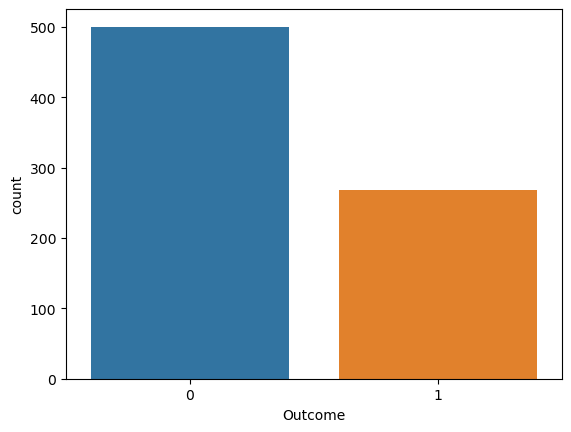

In [6]:
sns.countplot(x='Outcome',data=train_data)
plt.show()

In [7]:
print(train_data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


LET IMBALANCED DATASET BE SUCH

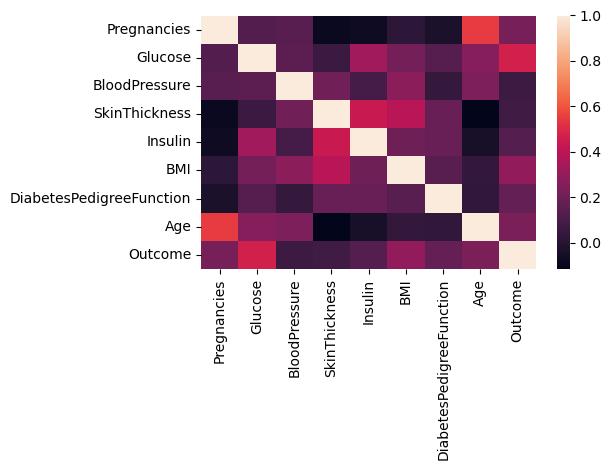

In [8]:
correlation_matrix=train_data.corr()
sns.heatmap(correlation_matrix)
plt.tight_layout()
plt.show()

NOT MUCH CORRELATION B/W FEATURES


In [9]:
print(train_data.skew())

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


In [10]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']


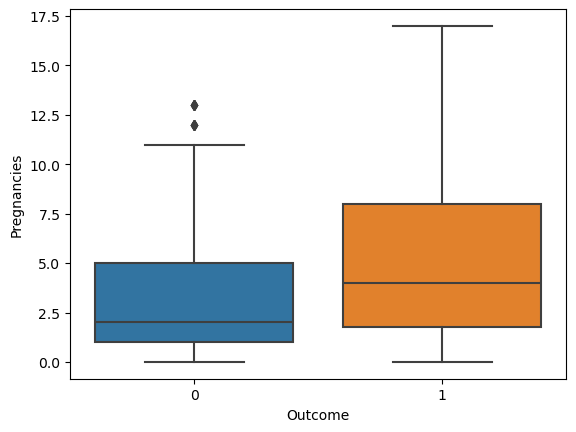

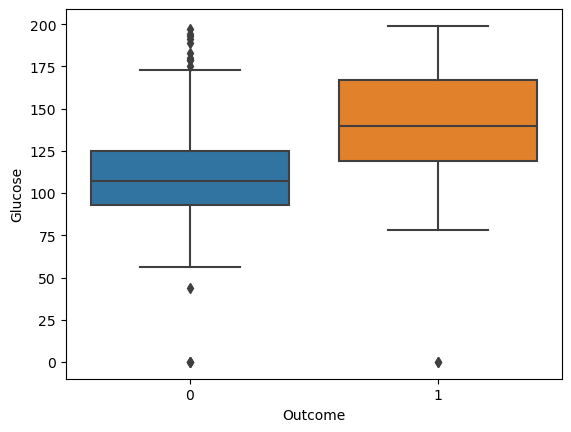

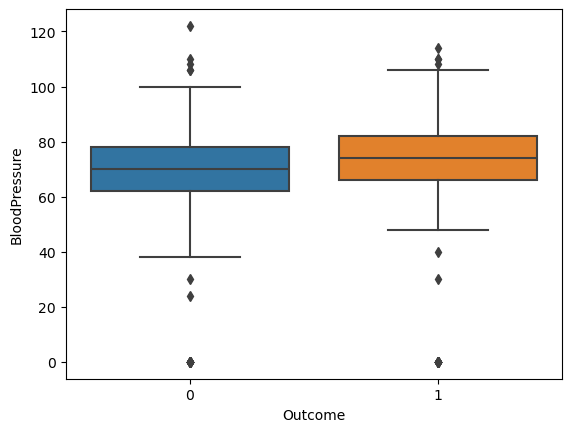

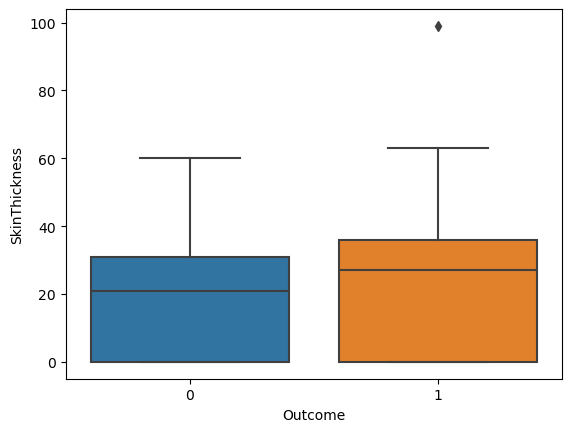

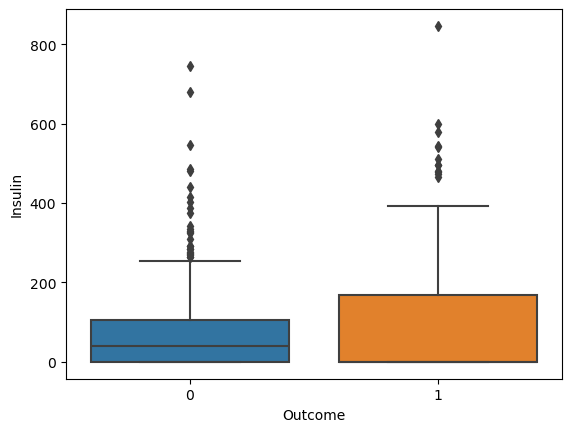

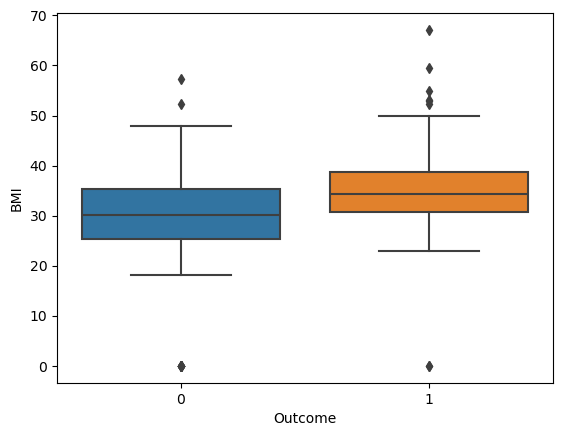

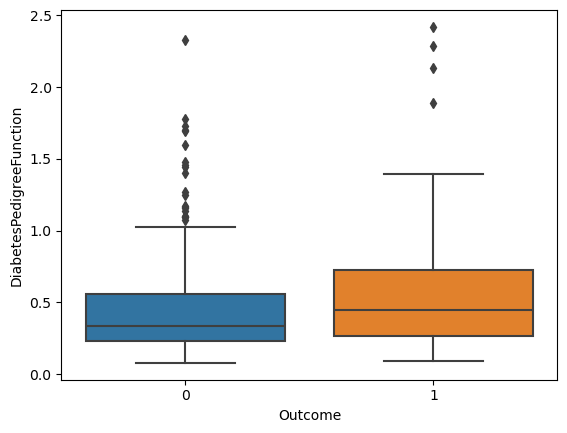

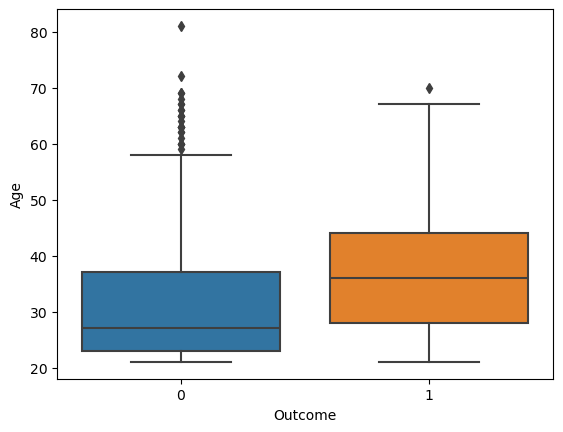

In [11]:
for c in cols:
    sns.boxplot(data=train_data,x="Outcome",y=c)
    plt.show()

In [12]:
import numpy as np
from sklearn.preprocessing import RobustScaler
outlier_features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
X=train_data[outlier_features]
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
outliers_mask = np.abs((X_scaled - np.median(X_scaled, axis=0)) / IQR) > 1.5
X_no_outliers = X[~outliers_mask.any(axis=1)]

train_data_processed=X_no_outliers


In [13]:
train_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               487 non-null    int64  
 1   Glucose                   487 non-null    int64  
 2   BloodPressure             487 non-null    int64  
 3   SkinThickness             487 non-null    int64  
 4   Insulin                   487 non-null    int64  
 5   BMI                       487 non-null    float64
 6   DiabetesPedigreeFunction  487 non-null    float64
 7   Age                       487 non-null    int64  
 8   Outcome                   487 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 38.0 KB


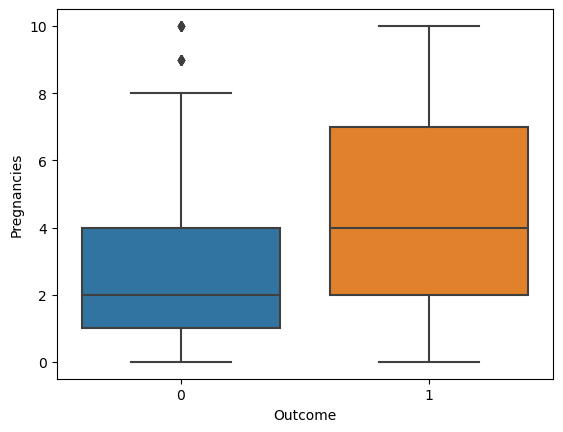

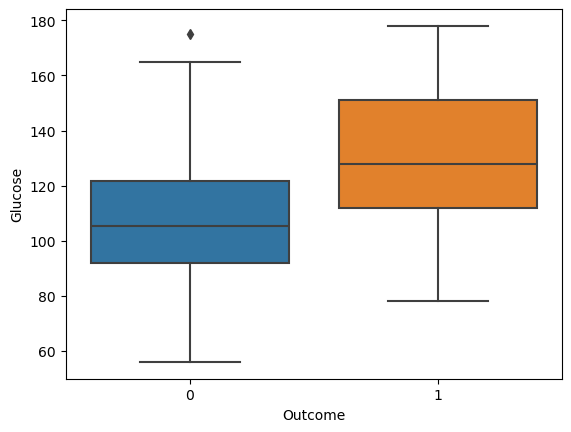

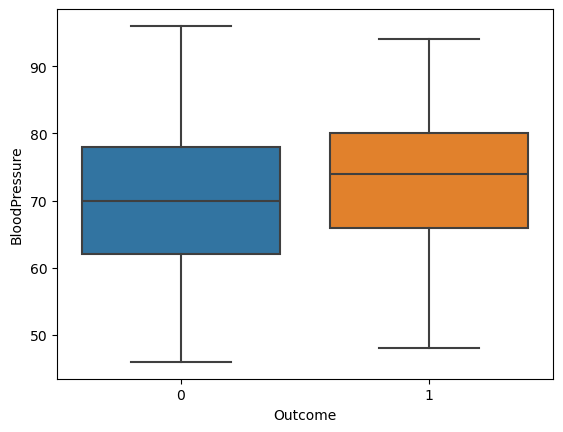

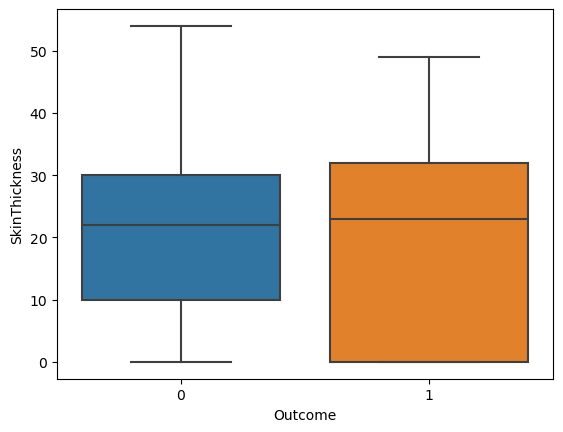

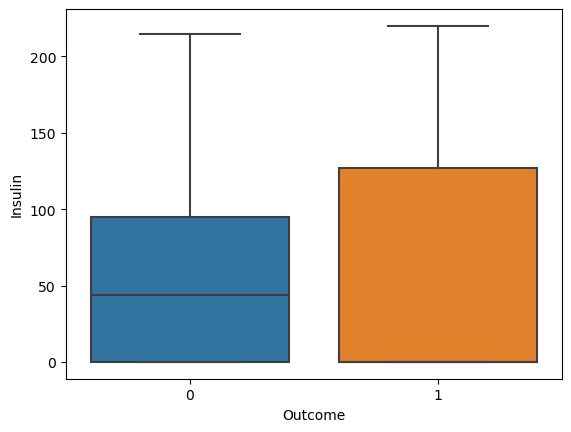

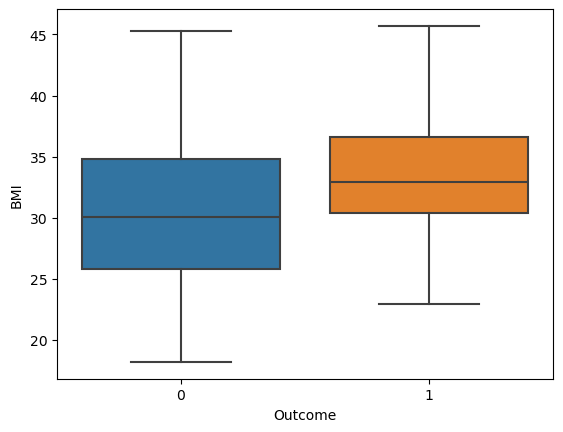

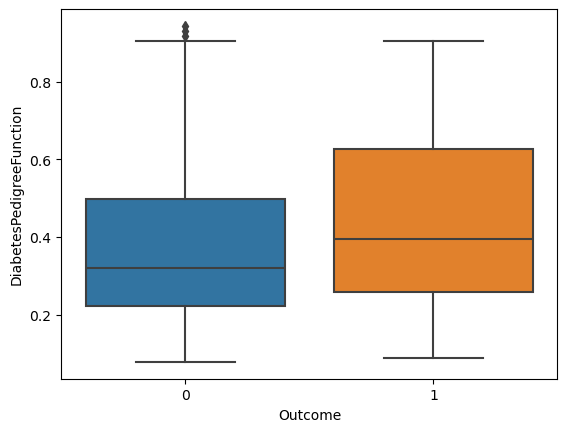

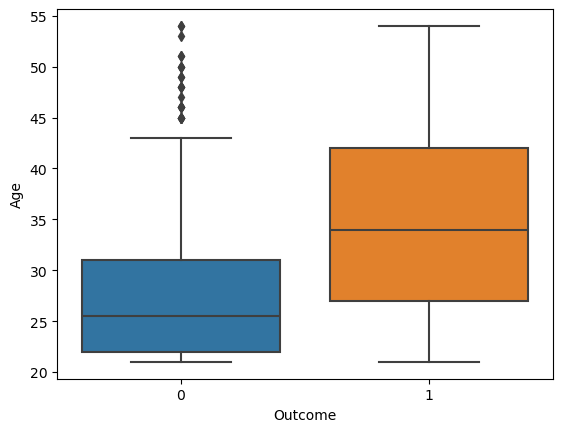

In [14]:
for c in cols:
    sns.boxplot(data=train_data_processed,x="Outcome",y=c)
    plt.show()

MOST OF THE OUTLIERS REMOVED

In [15]:
train_data_processed.skew()

Pregnancies                 0.775499
Glucose                     0.449270
BloodPressure               0.081093
SkinThickness              -0.079978
Insulin                     0.799890
BMI                         0.143307
DiabetesPedigreeFunction    0.685807
Age                         1.001122
Outcome                     1.117583
dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
train_data_processed[cols]=scaler.fit_transform(train_data_processed[cols])
train_data_processed

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1514375711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_processed[cols]=scaler.fit_transform(train_data_processed[cols])


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            0.6  0.754098           0.52       0.648148  0.000000  0.560000   
1            0.1  0.237705           0.40       0.537037  0.000000  0.305455   
3            0.1  0.270492           0.40       0.425926  0.427273  0.360000   
5            0.5  0.491803           0.56       0.000000  0.000000  0.269091   
6            0.3  0.180328           0.08       0.592593  0.400000  0.465455   
..           ...       ...            ...            ...       ...       ...   
762          0.9  0.270492           0.32       0.000000  0.000000  0.156364   
764          0.2  0.540984           0.48       0.500000  0.000000  0.676364   
765          0.5  0.532787           0.52       0.425926  0.509091  0.290909   
766          0.1  0.573770           0.28       0.000000  0.000000  0.432727   
767          0.1  0.303279           0.48       0.574074  0.000000  0.443636   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.633949  0.878788        1  
1                    0.315242  0.303030        0  
3                    0.102771  0.000000        0  
5                    0.142032  0.272727        0  
6                    0.196305  0.151515        1  
..                        ...       ...      ...  
762                  0.073903  0.363636        0  
764                  0.302540  0.181818        0  
765                  0.192841  0.272727        0  
766                  0.312933  0.787879        1  
767                  0.273672  0.060606        0  

[487 rows x 9 columns]

In [17]:
from sklearn.model_selection import train_test_split,cross_val_score
y=train_data_processed["Outcome"]
X=train_data_processed.drop(["Outcome"],axis=1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=9)
result=cross_val_score(knn,X,y,cv=5,scoring="accuracy").mean()
print(result)

0.7742688828108563


In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=77)
result=cross_val_score(rfc,X,y,cv=5,scoring="accuracy").mean()

print(result)

0.778329476120345


In [20]:
import optuna
def objective(trial):
    # Define the Random Forest Classifier with hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    result=cross_val_score(clf,X,y,cv=5,scoring="accuracy").mean()
    return result

c:\Users\Admin\anaconda3\envs\kitchen\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50,timeout=1000)
rf_opt=study.best_params
print(rf_opt)

[I 2024-01-03 16:53:10,677] A new study created in memory with name: no-name-3ac3e29f-f4b9-450b-9659-e12a4dc0ccbe
[I 2024-01-03 16:53:10,928] Trial 0 finished with value: 0.7433200084157374 and parameters: {'n_estimators': 57, 'max_depth': 5, 'min_samples_split': 0.7845159302071766, 'min_samples_leaf': 0.49386257296604086}. Best is trial 0 with value: 0.7433200084157374.
[I 2024-01-03 16:53:11,237] Trial 1 finished with value: 0.7433200084157374 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 0.3670937119858835, 'min_samples_leaf': 0.4449245763269227}. Best is trial 0 with value: 0.7433200084157374.
[I 2024-01-03 16:53:11,764] Trial 2 finished with value: 0.7433200084157374 and parameters: {'n_estimators': 126, 'max_depth': 14, 'min_samples_split': 0.7253704373456396, 'min_samples_leaf': 0.27250838976151864}. Best is trial 0 with value: 0.7433200084157374.
[I 2024-01-03 16:53:12,564] Trial 3 finished with value: 0.7433200084157374 and parameters: {'n_estimator

{'n_estimators': 57, 'max_depth': 5, 'min_samples_split': 0.7845159302071766, 'min_samples_leaf': 0.49386257296604086}


In [22]:
rf_opt={'n_estimators': 99, 'max_depth': 18, 'min_samples_split': 0.10489058417364178, 'min_samples_leaf': 0.10149938672252704}
rfc=RandomForestClassifier(**rf_opt,random_state=77)
result=cross_val_score(rfc,X,y,cv=5,scoring="accuracy").mean()

print(result)

0.7597096570586997


In [23]:
import lightgbm 
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
result=cross_val_score(lgb,X,y,cv=5,scoring="accuracy")
print(result)

[LightGBM] [Info] Number of positive: 100, number of negative: 289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257069 -> initscore=-1.061257
[LightGBM] [Info] Start training from score -1.061257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [24]:
def lgbm_objective(trial):
    params = {
        'n_estimators' : trial.suggest_int('n_estimators',50,500),
        "max_depth":trial.suggest_int('max_depth',3,50),
        "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.25, log=True),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        "min_child_weight" : trial.suggest_float('min_child_weight', 0.5,4),
        "min_child_samples" : trial.suggest_int('min_child_samples',1,100),
        "subsample" : trial.suggest_float('subsample', 0.4, 1),
        "subsample_freq" : trial.suggest_int('subsample_freq',0,5),
        "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
        'num_leaves' : trial.suggest_int('num_leaves', 2, 64),
    }
    lgbmmodel_optuna = LGBMClassifier(**params, random_state=42)
    cv = abs(cross_val_score(lgbmmodel_optuna, X, y, cv = 4,scoring='neg_log_loss').mean())
    return cv

In [25]:
%%time
study = optuna.create_study(direction='maximize')
study.optimize(lgbm_objective, n_trials=100, timeout=2000)
lgbm_params=study.best_params


[I 2024-01-03 16:53:34,460] A new study created in memory with name: no-name-1d63de04-e872-4278-bcfd-02121d2879a0


[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:34,630] Trial 0 finished with value: 0.4527539407289608 and parameters: {'n_estimators': 363, 'max_depth': 15, 'learning_rate': 0.014797162356925677, 'reg_alpha': 0.0012794019152367658, 'reg_lambda': 4.558059871702612, 'min_child_weight': 2.164801696362422, 'min_child_samples': 43, 'subsample': 0.6852

[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-01-03 16:53:34,788] Trial 1 finished with value: 0.4470407934380668 and parameters: {'n_estimators': 353, 'max_depth': 30, 'learning_rate': 0.006683724743854018, 'reg_alpha': 0.2004030576613534, 'reg_lambda': 1.0760380990533003, 'min_child_weight': 2.330161356895758, 'min_child_samples': 30, 'subsample': 0.9335084275335768, 'subsample_freq': 0, 'colsample_bytree': 0.7515798260515729, 'num_leaves': 10}. Best is trial 0 with value: 0.4527539407289608.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optun

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-01-03 16:53:34,913] Trial 2 finished with value: 0.5655927663873441 and parameters: {'n_estimators': 423, 'max_depth': 23, 'learning_rate': 0.00021652246017078881, 'reg_alpha': 0.004889739615078719, 'reg_lambda': 4.126664015310265, 'min_child_weight': 1.693512111114154, 'min_child_samples': 81, 'subsample': 0.7241656484810188, 'subsample_freq': 3, 'colsample_bytree': 0.3096731010684865, 'num_leaves': 62}. Best is trial 2 with value: 0.5655927663873441.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:35,022] Trial 3 finished with value: 0.5295559820613898 and parameters: {'n_estimators': 319, 'max_depth': 41, 'learning_rate': 0.0012664639677656111, 'reg_alpha': 0.0944467442993975, 'reg_lambda': 0.0010675585471977363, 'min_child_weight': 2.3727460416402524, 'min_child_samples': 50, 'subsample': 0.4

[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:35,096] Trial 4 finished with value: 0.5512231129419519 and parameters: {'n_estimators': 138, 'max_depth': 14, 'learning_rate': 0.0015055268641482069, 'reg_alpha': 3.1572669449471853, 'reg_lambda': 0.004408080838784047, 'min_child_weight': 0.6633138116621066, 'min_child_samples': 32, 'subsample': 0.86

[LightGBM] [Info] Number of positive: 94, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 366, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256831 -> initscore=-1.062507
[LightGBM] [Info] Start training from score -1.062507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-01-03 16:53:35,346] Trial 5 finished with value: 0.545756755742495 and parameters: {'n_estimators': 423, 'max_depth': 27, 'learning_rate': 0.0004967613891196382, 'reg_alpha': 0.7653817796575249, 'reg_lambda': 0.0017502487629912525, 'min_child_weight': 3.1171850106024017, 'min_child_samples': 7, 'subsample': 0.9987739498395184, 'subsample_freq': 5, 'colsample_bytree': 0.37340114853450024, 'num_leaves': 31}. Best is trial 2 with value: 0.5655927663873441.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 94, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 366, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256831 -> initscore=-1.062507
[LightGBM] [Info] Start training from score -1.062507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-01-03 16:53:35,621] Trial 6 finished with value: 0.5598999293741155 and parameters: {'n_estimators': 411, 'max_depth': 28, 'learning_rate': 0.00011189471996563275, 'reg_alpha': 0.001626824208982463, 'reg_lambda': 0.003893537893886499, 'min_child_weight': 2.7004441361761207, 'min_child_samples': 14, 'subsample': 0.8909128124805779, 'subsample_freq': 3, 'colsample_bytree': 0.7980588862945315, 'num_leaves': 40}. Best is trial 2 with value: 0.5655927663873441.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.co

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:35,721] Trial 8 finished with value: 0.5288886404679125 and parameters: {'n_estimators': 59, 'max_depth': 7, 'learning_rate': 0.00451459817284601, 'reg_alpha': 0.031176147114817962, 'reg_lambda': 0.17245936340092666, 'min_child_weight': 2.5326454334000577, 'min_child_samples': 21, 'subsample': 0.56825

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:35,838] Trial 9 finished with value: 0.5066051563055695 and parameters: {'n_estimators': 483, 'max_depth': 41, 'learning_rate': 0.002211165169185977, 'reg_alpha': 2.7873142433747757, 'reg_lambda': 0.8742486284086478, 'min_child_weight': 1.993988690151638, 'min_child_samples': 48, 'subsample': 0.808608

[LightGBM] [Info] Number of positive: 94, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 366, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256831 -> initscore=-1.062507
[LightGBM] [Info] Start training from score -1.062507
[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No furthe

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:35,946] Trial 10 finished with value: 0.4653571479222923 and parameters: {'n_estimators': 211, 'max_depth': 49, 'learning_rate': 0.12116340507354247, 'reg_alpha': 0.014154568026781455, 'reg_lambda': 0.03637941689767835, 'min_child_weight': 3.906393761779064, 'min_child_samples': 97, 'subsample': 0.744

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:36,063] Trial 11 finished with value: 0.568635322293798 and parameters: {'n_estimators': 234, 'max_depth': 18, 'learning_rate': 0.00012281331444996622, 'reg_alpha': 0.005922399596062921, 'reg_lambda': 9.77814626643604, 'min_child_weight': 1.2442058979280697, 'min_child_samples': 79, 'subsample': 0.646

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:36,188] Trial 12 finished with value: 0.566052366715571 and parameters: {'n_estimators': 223, 'max_depth': 36, 'learning_rate': 0.00031949593118297674, 'reg_alpha': 0.005884013226578082, 'reg_lambda': 0.04422115944924654, 'min_child_weight': 1.1685383435886152, 'min_child_samples': 71, 'subsample': 0.

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:36,289] Trial 13 finished with value: 0.5687059108515976 and parameters: {'n_estimators': 145, 'max_depth': 19, 'learning_rate': 0.00012441045695266213, 'reg_alpha': 0.001146522014970437, 'reg_lambda': 0.3088027114172543, 'min_child_weight': 1.3600762132509672, 'min_child_samples': 68, 'subsample': 0.

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:36,410] Trial 14 finished with value: 0.5628362516521194 and parameters: {'n_estimators': 258, 'max_depth': 17, 'learning_rate': 0.000624636003004883, 'reg_alpha': 0.005092333556558389, 'reg_lambda': 0.4957670332896929, 'min_child_weight': 1.158229382986506, 'min_child_samples': 68, 'subsample': 0.410119836352533, 'subsample_freq': 5, 'colsample_bytree': 0.20721136572570326, 'num_leaves': 64}. Best is trial 13 with value: 0.5687059108515976.


[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:36,529] Trial 15 finished with value: 0.4894845204301456 and parameters: {'n_estimators': 148, 'max_depth': 8, 'learning_rate': 0.040260480487771214, 'reg_alpha': 0.030197151511005906, 'reg_lambda': 6.186921420812596, 'min_child_weight': 0.5407869742469084, 'min_child_samples': 100, 'subsample': 0.611

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:36,615] Trial 16 finished with value: 0.5667463018285291 and parameters: {'n_estimators': 52, 'max_depth': 21, 'learning_rate': 0.0006708927070800921, 'reg_alpha': 0.014972185832633787, 'reg_lambda': 0.013702409172113966, 'min_child_weight': 1.0472947834811075, 'min_child_samples': 64, 'subsample': 0.

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:36,714] Trial 17 finished with value: 0.5687443392656641 and parameters: {'n_estimators': 190, 'max_depth': 12, 'learning_rate': 0.00010255363692179011, 'reg_alpha': 0.003476795985272742, 'reg_lambda': 1.969623776562238, 'min_child_weight': 1.4470332760421551, 'min_child_samples': 86, 'subsample': 0.6

[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-01-03 16:53:36,823] Trial 18 finished with value: 0.5655230458458758 and parameters: {'n_estimators': 185, 'max_depth': 3, 'learning_rate': 0.0002902256199612333, 'reg_alpha': 0.13184908499635864, 'reg_lambda': 1.7843363300131052, 'min_child_weight': 1.5643232133719267, 'min_child_samples': 91, 'subsample': 0.7700958339450665, 'subsample_freq': 3, 'colsample_bytree': 0.5523937613177881, 'num_leaves': 37}. Best is trial 17 with value: 0.5687443392656641.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:36,942] Trial 19 finished with value: 0.47013208766443343 and parameters: {'n_estimators': 100, 'max_depth': 24, 'learning_rate': 0.12911911585282806, 'reg_alpha': 0.0023827988240391774, 'reg_lambda': 0.3653280924396345, 'min_child_weight': 0.8667078347606378, 'min_child_samples': 57, 'subsample': 0.5

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:37,048] Trial 20 finished with value: 0.5184994575029076 and parameters: {'n_estimators': 181, 'max_depth': 11, 'learning_rate': 0.017352015261452795, 'reg_alpha': 8.602857188240195, 'reg_lambda': 1.9538512066055707, 'min_child_weight': 1.4818145779910432, 'min_child_samples': 86, 'subsample': 0.64418

[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:37,154] Trial 21 finished with value: 0.5686114013080535 and parameters: {'n_estimators': 272, 'max_depth': 19, 'learning_rate': 0.00010619403715789106, 'reg_alpha': 0.0032528718825317405, 'reg_lambda': 9.92623346118484, 'min_child_weight': 1.3399490074821252, 'min_child_samples': 76, 'subsample': 0.6

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-01-03 16:53:37,345] Trial 22 finished with value: 0.5670782605965992 and parameters: {'n_estimators': 239, 'max_depth': 12, 'learning_rate': 0.00020487759127085068, 'reg_alpha': 0.011421548458043093, 'reg_lambda': 3.0357203717200094, 'min_child_weight': 0.8570355917190966, 'min_child_samples': 61, 'subsample': 0.6788319923268727, 'subsample_freq': 4, 'colsample_bytree': 0.2703272727431254, 'num_leaves': 57}. Best is trial 17 with value: 0.5687443392656641.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),


[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:37,487] Trial 23 finished with value: 0.5646734874969621 and parameters: {'n_estimators': 303, 'max_depth': 3, 'learning_rate': 0.00018767207033612272, 'reg_alpha': 0.0010215151942888103, 'reg_lambda': 0.57926262433555, 'min_child_weight': 1.9839919456441282, 'min_child_samples': 89, 'subsample': 0.7922565571407705, 'subsample_freq': 3, 'colsample_bytree': 0.4355322173975438, 'num_leaves': 64}. Best is trial 17 with value: 0.5687443392656641.


[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:37,613] Trial 24 finished with value: 0.5679397112123423 and parameters: {'n_estimators': 115, 'max_depth': 18, 'learning_rate': 0.0004491107775440914, 'reg_alpha': 0.05021760501447855, 'reg_lambda': 9.62462786760932, 'min_child_weight': 1.398351392261224, 'min_child_samples': 73, 'subsample': 0.68105

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:37,720] Trial 25 finished with value: 0.5544472641074201 and parameters: {'n_estimators': 186, 'max_depth': 9, 'learning_rate': 0.001204471011091457, 'reg_alpha': 0.008904942990529888, 'reg_lambda': 1.867360820689015, 'min_child_weight': 1.8542393353012898, 'min_child_samples': 83, 'subsample': 0.5641

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:37,813] Trial 26 finished with value: 0.56913496932466 and parameters: {'n_estimators': 93, 'max_depth': 23, 'learning_rate': 0.00010075335501509739, 'reg_alpha': 0.0027048785097597353, 'reg_lambda': 0.08712126668258348, 'min_child_weight': 0.9167880143355722, 'min_child_samples': 58, 'subsample': 0.4

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:37,914] Trial 27 finished with value: 0.5661565273575656 and parameters: {'n_estimators': 94, 'max_depth': 23, 'learning_rate': 0.0007762536011831778, 'reg_alpha': 0.0033504582315569296, 'reg_lambda': 0.09076527053847677, 'min_child_weight': 0.7043652846246358, 'min_child_samples': 56, 'subsample': 0.4593723622994511, 'subsample_freq': 3, 'colsample_bytree': 0.27384751137082464, 'num_leaves': 38}. Best is trial 26 with value: 0.56913496932466.


[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:38,045] Trial 28 finished with value: 0.56718452101666 and parameters: {'n_estimators': 75, 'max_depth': 13, 'learning_rate': 0.0002969772789614585, 'reg_alpha': 0.002349957897413008, 'reg_lambda': 0.06902109736919172, 'min_child_weight': 0.9385311862550365, 'min_child_samples': 40, 'subsample': 0.478

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:38,154] Trial 29 finished with value: 0.5398389743467412 and parameters: {'n_estimators': 122, 'max_depth': 25, 'learning_rate': 0.0023336713954147676, 'reg_alpha': 0.0010781868836573973, 'reg_lambda': 0.25466578590397027, 'min_child_weight': 2.9095261196698097, 'min_child_samples': 41, 'subsample': 0

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:38,301] Trial 30 finished with value: 0.5673459018762514 and parameters: {'n_estimators': 158, 'max_depth': 15, 'learning_rate': 0.00018489725498441333, 'reg_alpha': 0.36493282458707504, 'reg_lambda': 0.016187211222102694, 'min_child_weight': 1.5377307219048797, 'min_child_samples': 67, 'subsample': 0

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),


[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-01-03 16:53:38,453] Trial 31 finished with value: 0.5687537774663114 and parameters: {'n_estimators': 205, 'max_depth': 20, 'learning_rate': 0.00010139505944670221, 'reg_alpha': 0.007085587929431278, 'reg_lambda': 4.4723993346798405, 'min_child_weight': 1.2573679328280203, 'min_child_samples': 93, 'subsample': 0.7019009267697564, 'subsample_freq': 4, 'colsample_bytree': 0.20122243519116498, 'num_leaves': 60}. Best is trial 26 with value: 0.56913496932466.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com

[LightGBM] [Info] Number of positive: 94, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 366, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256831 -> initscore=-1.062507
[LightGBM] [Info] Start training from score -1.062507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-01-03 16:53:38,598] Trial 32 finished with value: 0.5686947975563237 and parameters: {'n_estimators': 195, 'max_depth': 20, 'learning_rate': 0.0001013063999479685, 'reg_alpha': 0.00223829922221236, 'reg_lambda': 0.8924231345767055, 'min_child_weight': 2.124939787461218, 'min_child_samples': 95, 'subsample': 0.6989564607065117, 'subsample_freq': 4, 'colsample_bytree': 0.25484301301567164, 'num_leaves': 60}. Best is trial 26 with value: 0.56913496932466.


[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:38,720] Trial 33 finished with value: 0.5684661166141534 and parameters: {'n_estimators': 164, 'max_depth': 31, 'learning_rate': 0.00016735811214109255, 'reg_alpha': 0.018819510572580345, 'reg_lambda': 3.000646840205624, 'min_child_weight': 1.1041710377983593, 'min_child_samples': 91, 'subsample': 0.7

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:38,862] Trial 34 finished with value: 0.5664210921016314 and parameters: {'n_estimators': 90, 'max_depth': 22, 'learning_rate': 0.00037384211322589393, 'reg_alpha': 0.007366127728574351, 'reg_lambda': 0.15944528264917768, 'min_child_weight': 1.682606822827716, 'min_child_samples': 58, 'subsample': 0.5

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:38,973] Trial 35 finished with value: 0.568019787685352 and parameters: {'n_estimators': 129, 'max_depth': 17, 'learning_rate': 0.00024739276751386093, 'reg_alpha': 0.0033954806228215302, 'reg_lambda': 1.2865275830193699, 'min_child_weight': 0.526238782790647, 'min_child_samples': 84, 'subsample': 0.8

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),


[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-01-03 16:53:39,136] Trial 36 finished with value: 0.47255118134034807 and parameters: {'n_estimators': 303, 'max_depth': 27, 'learning_rate': 0.008523279386918336, 'reg_alpha': 0.0018589624080669167, 'reg_lambda': 5.009801119259955, 'min_child_weight': 0.8107912285412964, 'min_child_samples': 74, 'subsample': 0.7255416115582781, 'subsample_freq': 3, 'colsample_bytree': 0.7709064171353993, 'num_leaves': 16}. Best is trial 26 with value: 0.56913496932466.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/o

[LightGBM] [Info] Number of positive: 93, number of negative: 272


[I 2024-01-03 16:53:39,295] Trial 37 finished with value: 0.5673435630899172 and parameters: {'n_estimators': 211, 'max_depth': 14, 'learning_rate': 0.00016028877033947097, 'reg_alpha': 0.003992540953578392, 'reg_lambda': 0.3525677888693635, 'min_child_weight': 3.430447444073927, 'min_child_samples': 48, 'subsample': 0.6680806247396369, 'subsample_freq': 5, 'colsample_bytree': 0.2494298625701703, 'num_leaves': 49}. Best is trial 26 with value: 0.56913496932466.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/o

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2024-01-03 16:53:39,441] Trial 38 finished with value: 0.5603831034189966 and parameters: {'n_estimators': 248, 'max_depth': 16, 'learning_rate': 0.00038844427011444925, 'reg_alpha': 0.022447716228537383, 'reg_lambda': 0.023228124954871567, 'min_child_weight': 2.199734067509412, 'min_child_samples': 53, 'subsample': 0.5539703240497342, 'subsample_freq': 4, 'colsample_bytree': 0.4170315888911168, 'num_leaves': 60}. Best is trial 26 with value: 0.56913496932466.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com

[LightGBM] [Info] Number of positive: 94, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 366, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256831 -> initscore=-1.062507
[LightGBM] [Info] Start training from score -1.062507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:39,745] Trial 40 finished with value: 0.5619561526581209 and parameters: {'n_estimators': 343, 'max_depth': 6, 'learning_rate': 0.00014697846977533653, 'reg_alpha': 0.009556470303056702, 'reg_lambda': 0.008275026193689809, 'min_child_weight': 1.632411194476826, 'min_child_samples': 33, 'subsample': 0.

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-01-03 16:53:39,889] Trial 41 finished with value: 0.5685881148523122 and parameters: {'n_estimators': 201, 'max_depth': 20, 'learning_rate': 0.00011046312427590539, 'reg_alpha': 0.001918196724938045, 'reg_lambda': 0.9155825362658045, 'min_child_weight': 2.0218543102505935, 'min_child_samples': 93, 'subsample': 0.703023200562491, 'subsample_freq': 4, 'colsample_bytree': 0.24559046113383862, 'num_leaves': 60}. Best is trial 26 with value: 0.56913496932466.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/

[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:40,114] Trial 43 finished with value: 0.5676621562861962 and parameters: {'n_estimators': 115, 'max_depth': 24, 'learning_rate': 0.00022053708354797922, 'reg_alpha': 0.0013973713543015938, 'reg_lambda': 0.4914774941029879, 'min_child_weight': 2.5646806658425687, 'min_child_samples': 99, 'subsample': 0

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:40,328] Trial 45 finished with value: 0.5681522307720173 and parameters: {'n_estimators': 82, 'max_depth': 34, 'learning_rate': 0.0002327864889217909, 'reg_alpha': 0.004407460304889394, 'reg_lambda': 3.0628154109581174, 'min_child_weight': 2.3291041648941793, 'min_child_samples': 87, 'subsample': 0.77

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:40,562] Trial 47 finished with value: 0.5689835172309242 and parameters: {'n_estimators': 104, 'max_depth': 37, 'learning_rate': 0.00010069273512200915, 'reg_alpha': 0.0015520839764655216, 'reg_lambda': 1.3604234301816533, 'min_child_weight': 3.160205209934747, 'min_child_samples': 81, 'subsample': 0.

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:40,769] Trial 49 finished with value: 0.5687385975461492 and parameters: {'n_estimators': 73, 'max_depth': 38, 'learning_rate': 0.00015331705332342143, 'reg_alpha': 0.006823623465739441, 'reg_lambda': 6.357015141105412, 'min_child_weight': 3.148228243133946, 'min_child_samples': 97, 'subsample': 0.948

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:41,028] Trial 51 finished with value: 0.5685571083434376 and parameters: {'n_estimators': 143, 'max_depth': 32, 'learning_rate': 0.00013473768246036888, 'reg_alpha': 0.0015565314258343104, 'reg_lambda': 1.8620966230861546, 'min_child_weight': 2.52775328528907, 'min_child_samples': 81, 'subsample': 0.9

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:41,222] Trial 53 finished with value: 0.5689068736581855 and parameters: {'n_estimators': 52, 'max_depth': 29, 'learning_rate': 0.0002845916077530625, 'reg_alpha': 0.005473491889899657, 'reg_lambda': 0.6120523729676429, 'min_child_weight': 3.3525824727422076, 'min_child_samples': 90, 'subsample': 0.76

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:41,413] Trial 55 finished with value: 0.5690090134422787 and parameters: {'n_estimators': 74, 'max_depth': 34, 'learning_rate': 0.0001443291448017096, 'reg_alpha': 0.0023924772507463708, 'reg_lambda': 0.1834524088809616, 'min_child_weight': 3.708785480385548, 'min_child_samples': 77, 'subsample': 0.7924146762204198, 'subsample_freq': 3, 'colsample_bytree': 0.2839387421193781, 'num_leaves': 64}. Best is trial 52 with value: 0.5693113199076558.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.co

[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:41,664] Trial 57 finished with value: 0.5682333942360414 and parameters: {'n_estimators': 103, 'max_depth': 35, 'learning_rate': 0.0002008801989102218, 'reg_alpha': 1.0458578305648116, 'reg_lambda': 0.13756566889568117, 'min_child_weight': 3.6495907784804578, 'min_child_samples': 23, 'subsample': 0.80

[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:41,943] Trial 59 finished with value: 0.5664714066529406 and parameters: {'n_estimators': 384, 'max_depth': 33, 'learning_rate': 0.0001362975486377273, 'reg_alpha': 0.00277650554688687, 'reg_lambda': 0.3910143676270907, 'min_child_weight': 3.7796732099906536, 'min_child_samples': 87, 'subsample': 0.97

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:42,173] Trial 60 finished with value: 0.5527758899634277 and parameters: {'n_estimators': 453, 'max_depth': 44, 'learning_rate': 0.00034105584202093745, 'reg_alpha': 0.01247157743182726, 'reg_lambda': 1.3374843892648702, 'min_child_weight': 2.9687656222655616, 'min_child_samples': 70, 'subsample': 0.7886199812206347, 'subsample_freq': 2, 'colsample_bytree': 0.9585740261667394, 'num_leaves': 64}. Best is trial 52 with value: 0.5693113199076558.


[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:42,254] Trial 61 finished with value: 0.5690081407826478 and parameters: {'n_estimators': 50, 'max_depth': 27, 'learning_rate': 0.0002480537992021162, 'reg_alpha': 0.004341765790480479, 'reg_lambda': 0.7212458115145421, 'min_child_weight': 3.2475559250619574, 'min_child_samples': 88, 'subsample': 0.76

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:42,506] Trial 63 finished with value: 0.5691800494646377 and parameters: {'n_estimators': 67, 'max_depth': 31, 'learning_rate': 0.00012790940861377086, 'reg_alpha': 0.004070164817383686, 'reg_lambda': 0.19135875243442768, 'min_child_weight': 3.046953337883334, 'min_child_samples': 80, 'subsample': 0.7

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:42,713] Trial 65 finished with value: 0.5686923613426397 and parameters: {'n_estimators': 82, 'max_depth': 22, 'learning_rate': 0.00024049144644350352, 'reg_alpha': 0.009277251160800594, 'reg_lambda': 0.0358317935558426, 'min_child_weight': 2.756021038270651, 'min_child_samples': 89, 'subsample': 0.71

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:42,920] Trial 67 finished with value: 0.5692526593963693 and parameters: {'n_estimators': 52, 'max_depth': 30, 'learning_rate': 0.00012880690898310214, 'reg_alpha': 0.004141214476629011, 'reg_lambda': 0.7423749818640851, 'min_child_weight': 3.60033360199957, 'min_child_samples': 85, 'subsample': 0.795

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:43,149] Trial 69 finished with value: 0.5673540404384132 and parameters: {'n_estimators': 125, 'max_depth': 33, 'learning_rate': 0.0001884942425450954, 'reg_alpha': 0.0012820976379866974, 'reg_lambda': 0.0544471724326253, 'min_child_weight': 3.6293522195950834, 'min_child_samples': 71, 'subsample': 0.

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:43,351] Trial 71 finished with value: 0.5692765667078072 and parameters: {'n_estimators': 53, 'max_depth': 28, 'learning_rate': 0.00012757910000940823, 'reg_alpha': 0.004916181656930758, 'reg_lambda': 0.7899951002222521, 'min_child_weight': 2.613582700289247, 'min_child_samples': 92, 'subsample': 0.74

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-01-03 16:53:43,528] Trial 73 finished with value: 0.5692371313858776 and parameters: {'n_estimators': 63, 'max_depth': 25, 'learning_rate': 0.00012301263774831765, 'reg_alpha': 0.0035590796778243077, 'reg_lambda': 0.427089744994016, 'min_child_weight': 2.616550464059967, 'min_child_samples': 92, 'subsample': 0.6710573212955431, 'subsample_freq': 4, 'colsample_bytree': 0.2230573717594308, 'num_leaves': 56}. Best is trial 52 with value: 0.5693113199076558.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/

[LightGBM] [Info] Number of positive: 94, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 366, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256831 -> initscore=-1.062507
[LightGBM] [Info] Start training from score -1.062507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:43,736] Trial 75 finished with value: 0.5692300596425601 and parameters: {'n_estimators': 61, 'max_depth': 24, 'learning_rate': 0.00012713556839942273, 'reg_alpha': 0.007414220069765399, 'reg_lambda': 0.4020479265309613, 'min_child_weight': 2.282128090615103, 'min_child_samples': 92, 'subsample': 0.67

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:44,018] Trial 78 finished with value: 0.5690832757092774 and parameters: {'n_estimators': 88, 'max_depth': 29, 'learning_rate': 0.00012339384628138272, 'reg_alpha': 0.011011816866093335, 'reg_lambda': 0.33693661850893536, 'min_child_weight': 3.956764964622426, 'min_child_samples': 85, 'subsample': 0.6

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:44,207] Trial 80 finished with value: 0.5688721974872084 and parameters: {'n_estimators': 51, 'max_depth': 28, 'learning_rate': 0.0003255573158306786, 'reg_alpha': 0.007702720955916441, 'reg_lambda': 0.9347701518958763, 'min_child_weight': 3.035772126962456, 'min_child_samples': 97, 'subsample': 0.593

[LightGBM] [Info] Number of positive: 94, number of negative: 271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257534 -> initscore=-1.058824
[LightGBM] [Info] Start training from score -1.058824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:44,479] Trial 82 finished with value: 0.5684233242532598 and parameters: {'n_estimators': 105, 'max_depth': 28, 'learning_rate': 0.0002560250768981291, 'reg_alpha': 0.0034781587043838298, 'reg_lambda': 0.692292226347008, 'min_child_weight': 1.8351818844347816, 'min_child_samples': 90, 'subsample': 0.6

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:44,666] Trial 84 finished with value: 0.5692772051180963 and parameters: {'n_estimators': 51, 'max_depth': 30, 'learning_rate': 0.00012124296361082807, 'reg_alpha': 0.022995614652597276, 'reg_lambda': 0.7391337968761067, 'min_child_weight': 2.079761348634031, 'min_child_samples': 94, 'subsample': 0.65

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:44,901] Trial 86 finished with value: 0.5688219131300589 and parameters: {'n_estimators': 79, 'max_depth': 22, 'learning_rate': 0.00021723387521221027, 'reg_alpha': 0.047230844824852125, 'reg_lambda': 1.4522681655315175, 'min_child_weight': 2.2519818017048765, 'min_child_samples': 94, 'subsample': 0.6276829966075941, 'subsample_freq': 5, 'colsample_bytree': 0.25044390635442376, 'num_leaves': 51}. Best is trial 52 with value: 0.5693113199076558.
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:45,156] Trial 88 finished with value: 0.5691446640563782 and parameters: {'n_estimators': 59, 'max_depth': 26, 'learning_rate': 0.00016221799243457604, 'reg_alpha': 0.07937234735952013, 'reg_lambda': 1.0671842149976525, 'min_child_weight': 2.1159644229446912, 'min_child_samples': 98, 'subsample': 0.65

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:45,351] Trial 90 finished with value: 0.567954759950177 and parameters: {'n_estimators': 108, 'max_depth': 21, 'learning_rate': 0.0002040130845053391, 'reg_alpha': 0.18157529092643832, 'reg_lambda': 1.6102017393959716, 'min_child_weight': 2.2629141178271985, 'min_child_samples': 100, 'subsample': 0.66

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:45,585] Trial 92 finished with value: 0.5691668169298542 and parameters: {'n_estimators': 59, 'max_depth': 19, 'learning_rate': 0.00015237429239022343, 'reg_alpha': 0.012874593870932522, 'reg_lambda': 1.0233402145199362, 'min_child_weight': 2.176871409008747, 'min_child_samples': 95, 'subsample': 0.64

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:45,852] Trial 94 finished with value: 0.5692078754634364 and parameters: {'n_estimators': 72, 'max_depth': 28, 'learning_rate': 0.00011462094396653195, 'reg_alpha': 0.03285460247205726, 'reg_lambda': 0.7568249494228027, 'min_child_weight': 2.4919410731273133, 'min_child_samples': 87, 'subsample': 0.59

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:46,089] Trial 96 finished with value: 0.49977522132496127 and parameters: {'n_estimators': 84, 'max_depth': 34, 'learning_rate': 0.04477018610944816, 'reg_alpha': 0.023774994306053523, 'reg_lambda': 0.5282418757537177, 'min_child_weight': 2.6528742411918462, 'min_child_samples': 89, 'subsample': 0.576

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_15132\1653882963.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
[I 2024-01-03 16:53:46,346] Trial 98 finished with value: 0.5686794515324571 and parameters: {'n_estimators': 97, 'max_depth': 32, 'learning_rate': 0.00021763317966935362, 'reg_alpha': 0.0266768334835107, 'reg_lambda': 0.6281568510655352, 'min_child_weight': 2.481864141061289, 'min_child_samples': 95, 'subsample': 0.6940

[LightGBM] [Info] Number of positive: 93, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254795 -> initscore=-1.073203
[LightGBM] [Info] Start training from score -1.073203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [26]:
lg_opt={'n_estimators': 365, 'max_depth': 24, 'learning_rate': 0.24879507030318518, 'reg_alpha': 0.19000571351932918, 'reg_lambda': 0.011924586504616742, 'min_child_weight': 3.5462349247013156, 'min_child_samples': 36, 'subsample': 0.9995104815156538, 'subsample_freq': 1, 'colsample_bytree': 0.2569159799571018, 'num_leaves': 46}

In [27]:
from sklearn.ensemble import VotingClassifier
lgopt=LGBMClassifier(**lg_opt,random_state=77)
rfopt=RandomForestClassifier(**rf_opt,random_state=77)
knn=KNeighborsClassifier(n_neighbors=9)
ensemble=VotingClassifier(estimators=[('lgb',lgopt),('rf',rfopt),('knn',knn)],voting='soft',weights=[0.2,0.2,0.6])
final_result=cross_val_score(ensemble,X,y,cv=5,scoring="accuracy").mean()
print(final_result)

[LightGBM] [Info] Number of positive: 100, number of negative: 289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257069 -> initscore=-1.061257
[LightGBM] [Info] Start training from score -1.061257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

HENCE A cross validation accuaracy of 75.13

In [28]:
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer()
train_data[cols] = power_transformer.fit_transform(train_data[cols])

print(train_data.skew())

Pregnancies                -0.044644
Glucose                     0.122640
BloodPressure              -0.516806
SkinThickness              -0.458444
Insulin                     0.049581
BMI                         0.180839
DiabetesPedigreeFunction    0.142321
Age                         0.150219
Outcome                     0.635017
dtype: float64


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
train_data[cols]=scaler.fit_transform(train_data[cols])


In [30]:
# sns.pairplot(data=train_data,hue="Outcome")
# plt.show()

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score
y=train_data["Outcome"]
X=train_data.drop(["Outcome"],axis=1)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=9)
result=cross_val_score(knn,X,y,cv=5,scoring="accuracy").mean()
print(result)

0.7591460826754945


In [33]:
import optuna
def objective(trial):
    knn = KNeighborsClassifier(n_neighbors=trial.suggest_int('n_neighbors', 1, 10))
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

    return score

In [34]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)
# params=study.best_params
# print(params)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=77)
result=cross_val_score(rfc,X,y,cv=5,scoring="accuracy").mean()

print(result)

0.7669977081741788


In [36]:
def objective(trial):
    # Define the Random Forest Classifier with hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    result=cross_val_score(clf,X,y,cv=5,scoring="accuracy").mean()
    return result

In [37]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50,timeout=1000)
# rf_params=study.best_params
# print(rf_params)

In [38]:
# rf_params={'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 0.2031670111795264, 'min_samples_leaf': 0.12715020007805802}
# rf_classifier=RandomForestClassifier(**rf_params,random_state=77)
# result=cross_val_score(rf_classifier,X,y,cv=5,scoring="accuracy")
# print(result)

# rf_params={'n_estimators': 200, 'max_depth': 6, 'min_samples_split': 0.2031670111795264, 'min_samples_leaf': 0.12715020007805802}


In [49]:
from xgboost import XGBClassifier
# xg=XGBClassifier(n_estimators=100)
# result=cross_val_score(xg,X,y,cv=5,scoring="accuracy")
# print(result)

In [50]:
def xg_objective(trial):
    params = {
    'n_estimators': trial.suggest_int('n_estimators', 300,750),
    'max_depth': trial.suggest_int('max_depth', 3, 50),
    'min_child_weight': trial.suggest_float('min_child_weight', 2,50),
    'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.2, log = True),
    'subsample': trial.suggest_float('subsample', 0.2, 1),
    'gamma': trial.suggest_float('gamma', 1e-4, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree',0.2,1),
    'colsample_bylevel': trial.suggest_float('colsample_bylevel',0.2,1),
    'colsample_bynode': trial.suggest_float('colsample_bynode', 0.2, 1)
    }
    xgbmodel_optuna = XGBClassifier(**params, random_state = 42)

    cv = abs(cross_val_score(xgbmodel_optuna, X, y, cv = 4,scoring='neg_log_loss').mean())
    return cv

In [51]:
# %%time
# study = optuna.create_study(direction='maximize')
# study.optimize(xg_objective, n_trials=100, timeout=2000)
# xgboost_params=study.best_params

In [52]:
# import lightgbm 
# from lightgbm import LGBMClassifier
# lgb=LGBMClassifier()
# result=cross_val_score(lgb,X,y,cv=5,scoring="accuracy")
# print(result)

In [54]:
def lgbm_objective(trial):
    params = {
        'n_estimators' : trial.suggest_int('n_estimators',50,500),
        "max_depth":trial.suggest_int('max_depth',3,50),
        "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.25, log=True),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        "min_child_weight" : trial.suggest_float('min_child_weight', 0.5,4),
        "min_child_samples" : trial.suggest_int('min_child_samples',1,100),
        "subsample" : trial.suggest_float('subsample', 0.4, 1),
        "subsample_freq" : trial.suggest_int('subsample_freq',0,5),
        "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
        'num_leaves' : trial.suggest_int('num_leaves', 2, 64),
    }
    lgbmmodel_optuna = LGBMClassifier(**params, random_state=42)
    cv = abs(cross_val_score(lgbmmodel_optuna, X, y, cv = 4,scoring='neg_log_loss').mean())
    return cv

In [55]:
# %%time
# study = optuna.create_study(direction='maximize')
# study.optimize(lgbm_objective, n_trials=100, timeout=2000)
# lgbm_params=study.best_params

In [57]:
lg={'n_estimators': 450, 'max_depth': 24, 'learning_rate': 0.13729265118861184, 'reg_alpha': 0.21343169047302657, 'reg_lambda': 0.3059331216721258, 'min_child_weight': 2.986981357095261, 'min_child_samples': 4, 'subsample': 0.9467872703453061, 'subsample_freq': 1, 'colsample_bytree': 0.32156547283221715, 'num_leaves': 43}
xg={'n_estimators': 522, 'max_depth': 21, 'min_child_weight': 39.8078018786496, 'learning_rate': 0.00020461882312119558, 'subsample': 0.20360505898481351, 'gamma': 0.885913904392577, 'colsample_bytree': 0.8485227220650885, 'colsample_bylevel': 0.6456768760536946, 'colsample_bynode': 0.8042879748235798}




In [58]:
from sklearn.ensemble import VotingClassifier
lgopt=LGBMClassifier(**lg,random_state=77)
xgopt=XGBClassifier(**xg,random_state=77)
knn=KNeighborsClassifier(n_neighbors=9)
ensemble=VotingClassifier(estimators=[('lgb',lgopt),('xgb',xgopt),('knn',knn)],voting='soft',weights=[0.2,0.2,0.6])
final_result=cross_val_score(ensemble,X,y,cv=5,scoring="accuracy").mean()
print(final_result)

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 